In [1]:
#drop the first column
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes_diagnosis.csv')
df = df.iloc[:, 1:]
df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)
df.head()

,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,...,Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,NaN,...,15.0,NaN,NaN,63.0,High school graduate,"$73,106",No,Yes,Yes,No
1,NaN,25.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,NaN,NaN,Female,54.0,College graduate,"$22,322",No,No,No,No
2,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1.0,...,NaN,1.0,NaN,NaN,High school graduate,"$29,097",No,Yes,Yes,NaN
3,1.0,27.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,74.0,Some high school,"$55,498",No,Yes,No,No
4,NaN,24.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,Female,NaN,Some college,"$15,629",No,Yes,NaN,No


In [2]:
df = pd.read_csv('zxia0226_A1_CleanDataset.csv')

# Calculating Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display missing value statistics
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))


                      Missing Values  Percentage
CholCheck                     150937   56.999947
BMI                            87384   32.999751
Smoker                        119160   44.999660
Stroke                        158881   59.999924
HeartDiseaseorAttack           71496   26.999796
PhysActivity                  188009   70.999841
Fruits                        161529   60.999917
Veggies                       169473   63.999894
AnyHealthcare                 182713   68.999856
NoDocbcCost                   198601   74.999811
GeneralHealth                  68848   25.999804
Mental (days)                 129752   48.999630
Physical (days)               142993   53.999970
DiffWalk                      142993   53.999970
Sex                            68848   25.999804
Age                            63552   23.999819
Education                      76792   28.999781
Income                         18536    6.999947
Diabetes                       21184    7.999940
BloodPressure       

In [3]:
import pandas as pd
from sklearn.impute import KNNImputer

# Reading CSV files
file_path = "zxia0226_A1_CleanDataset.csv"
df = pd.read_csv(file_path)

# Remove columns with more than 70% missing values
cols_to_drop = ['PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost']
df.drop(columns=cols_to_drop, inplace=True)
df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)
df.head(5)

,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,GeneralHealth,Mental (days),Physical (days),DiffWalk,Sex,Age,Education,Income,Diabetes,BloodPressure,Cholesterol,Alcoholic
0,NaN,40.0,NaN,NaN,0.0,NaN,NaN,15.0,NaN,NaN,63.0,High school graduate,"$73,106",No,Yes,Yes,No
1,NaN,25.0,NaN,0.0,0.0,Good,NaN,NaN,NaN,Female,54.0,College graduate,"$22,322",No,No,No,No
2,NaN,NaN,NaN,0.0,0.0,Poor,30.0,NaN,1.0,NaN,NaN,High school graduate,"$29,097",No,Yes,Yes,NaN
3,1.0,27.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,74.0,Some high school,"$55,498",No,Yes,No,No
4,NaN,24.0,NaN,NaN,0.0,Very Good,NaN,0.0,0.0,Female,NaN,Some college,"$15,629",No,Yes,NaN,No


In [4]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())  # Fill in the median
df['Age'] = df['Age'].fillna(df['Age'].mean())  # Fill with averages
df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)

In [5]:
df['BloodPressure'] = df['BloodPressure'].replace({'Yes': 1, 'No': 0}).astype(float)

# Calculate mode(), or 0 if empty
mode_value = df['BloodPressure'].mode()
fill_value = mode_value[0] if not mode_value.empty else 0

df['BloodPressure'] = df['BloodPressure'].fillna(fill_value).astype(int)

df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)

D:\Temp\ipykernel_213972\3944916314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BloodPressure'] = df['BloodPressure'].replace({'Yes': 1, 'No': 0}).astype(float)


In [6]:
# Filling missing categorical data
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])  # Filling of the plural
df['GeneralHealth'] = df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0])
# Filling missing categorical data
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])
df['GeneralHealth'] = df['GeneralHealth'].fillna(df['GeneralHealth'].mode()[0])

df["Diabetes"] = df["Diabetes"].fillna(0)
df["Cholesterol"] = df["Cholesterol"].fillna(0)
df["Alcoholic"] = df["Alcoholic"].fillna(0)


# Populate Education by Age Group
df['Education'] = df.groupby('Age')['Education'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))
# Remaining missing values are filled in with global plurals
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['Income'] = df['Income'].fillna('Unknown')
df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)

In [7]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = ['Mental (days)', 'Physical (days)']
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

for col in num_cols:
    df[col] = df.groupby('Age')[col].transform(
        lambda x: x.fillna(x.median() if not x.isna().all() else df[col].median())
    )


In [8]:
df['CholCheck'] = df['CholCheck'].replace({'Yes': 1, 'No': 0})
print(df['CholCheck'].value_counts())


CholCheck
1.0    109758
0.0      4107
Name: count, dtype: int64


In [9]:
global_mode = df['CholCheck'].mode()[0]
print(f"global plurality: {global_mode}")


global plurality: 1.0


In [10]:
df['CholCheck'] = df.groupby(['GeneralHealth', 'Age'])['CholCheck'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else global_mode)
)
print(f"Number of CholCheck missing values: {df['CholCheck'].isna().sum()}")


Number of CholCheck missing values: 0


In [11]:
df['CholCheck'] = df['CholCheck'].fillna(global_mode).astype(int)
print(df['CholCheck'].describe())


count    264802.000000
mean          0.984490
std           0.123569
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64


In [12]:
df['Smoker'] = df['Smoker'].replace({'Yes': 1, 'No': 0})
print(df['Smoker'].value_counts())


Smoker
 0.0     77321
 1.0     61021
 11.0     3678
-10.0     3622
Name: count, dtype: int64


In [13]:
df['Smoker'] = df.groupby('Age')['Smoker'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Smoker'].mode()[0])
)
print(f"Number of Smoker missing values: {df['Smoker'].isna().sum()}")


Number of Smoker missing values: 0


In [14]:
df['Smoker'] = df['Smoker'].fillna(df['Smoker'].mode()[0]).astype(int)
print(df['Smoker'].describe())


count    264802.000000
mean          0.333842
std           1.804123
min         -10.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          11.000000
Name: Smoker, dtype: float64


In [15]:
df['Stroke'] = df['Stroke'].replace({'Yes': 1, 'No': 0})
print(df['Stroke'].value_counts())


Stroke
0.0    101836
1.0      4085
Name: count, dtype: int64


In [16]:
df['Stroke'] = df.groupby('HeartDiseaseorAttack')['Stroke'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Stroke'].mode()[0])
)
print(f"Number of Stroke missing values: {df['Stroke'].isna().sum()}")


Number of Stroke missing values: 71496


In [17]:
df['Stroke'] = df['Stroke'].fillna(df['Stroke'].mode()[0]).astype(int)
print(df['Stroke'].describe())


count    264802.000000
mean          0.011261
std           0.105520
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Stroke, dtype: float64


In [18]:
df['DiffWalk'] = df['DiffWalk'].replace({'Yes': 1, 'No': 0})
print(df['DiffWalk'].value_counts())


DiffWalk
0.0    102235
1.0     19574
Name: count, dtype: int64


In [19]:
df['DiffWalk'] = df.groupby('Age')['DiffWalk'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['DiffWalk'].mode()[0])
)
print(f"Number of Diffwalk missing values: {df['DiffWalk'].isna().sum()}")


Number of Diffwalk missing values: 0


In [20]:
df['DiffWalk'] = df['DiffWalk'].fillna(df['DiffWalk'].mode()[0]).astype(int)
print(df['DiffWalk'].describe())


count    264802.000000
mean          0.073919
std           0.261640
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DiffWalk, dtype: float64


In [21]:
if df['HeartDiseaseorAttack'].isna().any():
    df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].fillna(0).astype(int)
    print("HeartDiseaseorAttack columns populated")


HeartDiseaseorAttack columns populated


In [22]:
bmi_outliers_count = len(df[(df['BMI'] < 10) | (df['BMI'] > 100)])
df.loc[(df['BMI'] < 10) | (df['BMI'] > 100), 'BMI'] = df['BMI'].median()
print(f"Fixed {bmi_outliers_count} BMI outliers.")


Fixed 8865 BMI outliers.


In [23]:
smoker_fixed = len(df[df['Smoker'] > 1])
df['Smoker'] = df['Smoker'].apply(lambda x: 1 if x >= 1 else 0)
print(f"Fixed {smoker_fixed} Smoker outliers")


Fixed 3678 Smoker outliers


In [24]:
age_outliers_count = len(df[(df['Age'] < 0) | (df['Age'] > 120)])
df.loc[(df['Age'] < 0) | (df['Age'] > 120), 'Age'] = df['Age'].median()
print(f"fixed {age_outliers_count} Age outliers")


fixed 10085 Age outliers


In [25]:
mental_days_clipped = len(df[(df['Mental (days)'] < 0) | (df['Mental (days)'] > 30)])
physical_days_clipped = len(df[(df['Physical (days)'] < 0) | (df['Physical (days)'] > 30)])
df['Mental (days)'] = df['Mental (days)'].clip(lower=0, upper=30)
df['Physical (days)'] = df['Physical (days)'].clip(lower=0, upper=30)
print(f"fixed {mental_days_clipped} Mental (days) outliers and {physical_days_clipped} Physical (days) outliers")


fixed 3372 Mental (days) outliers and 6184 Physical (days) outliers


In [26]:
binary_map = {'No': 0, 'Yes': 1}
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1, 'Diabetes': 1, 'Prediabetes': 1})
df['Cholesterol'] = df['Cholesterol'].map(binary_map)
df['Alcoholic'] = df['Alcoholic'].map(binary_map)
df['Sex'] = df['Sex'].map({'Female': 0, 'Male': 1})

print(df[['Diabetes', 'Cholesterol', 'Alcoholic', 'Sex']].head())


   Diabetes  Cholesterol  Alcoholic  Sex
0         0          1.0        0.0    0
1         0          0.0        0.0    0
2         0          1.0        NaN    0
3         0          0.0        0.0    0
4         0          NaN        0.0    0


D:\Temp\ipykernel_213972\3736886648.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1, 'Diabetes': 1, 'Prediabetes': 1})


In [27]:
df['Age'] = df['Age'].round().astype(int)
df['Mental (days)'] = df['Mental (days)'].round().astype(int)
df['Physical (days)'] = df['Physical (days)'].round().astype(int)

print(df[['Age', 'Mental (days)', 'Physical (days)']].dtypes)


Age                int32
Mental (days)      int32
Physical (days)    int32
dtype: object


In [28]:
education_order = {
    'Never attended school': 0,
    'Elementary': 1,
    'Some high school': 2, 
    'High school graduate': 3,
    'Some college': 4,
    'College graduate': 5
}

if df['Education'].dtype == 'object':
    known_values = set(education_order.keys())
    existing_values = set(df['Education'].unique())
    
    if existing_values.issubset(known_values):
        df['Education'] = df['Education'].map(education_order)
        print("Educational attainment has been converted to an ordinal code")
        print(df['Education'].value_counts())


Educational attainment has been converted to an ordinal code
Education
5    152281
4     52973
3     49344
2      7010
1      3061
0       133
Name: count, dtype: int64


In [29]:
if df['Income'].dtype == 'object':
    df['Income'] = df['Income'].str.extract(r'(\d+)').astype(float)
    df['Income'] = df['Income'].fillna(df['Income'].median())
    print(df['Income'].describe())


count    264802.000000
mean         42.486496
std          67.042849
min           0.000000
25%          16.000000
50%          25.000000
75%          49.000000
max         999.000000
Name: Income, dtype: float64


In [30]:
df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)


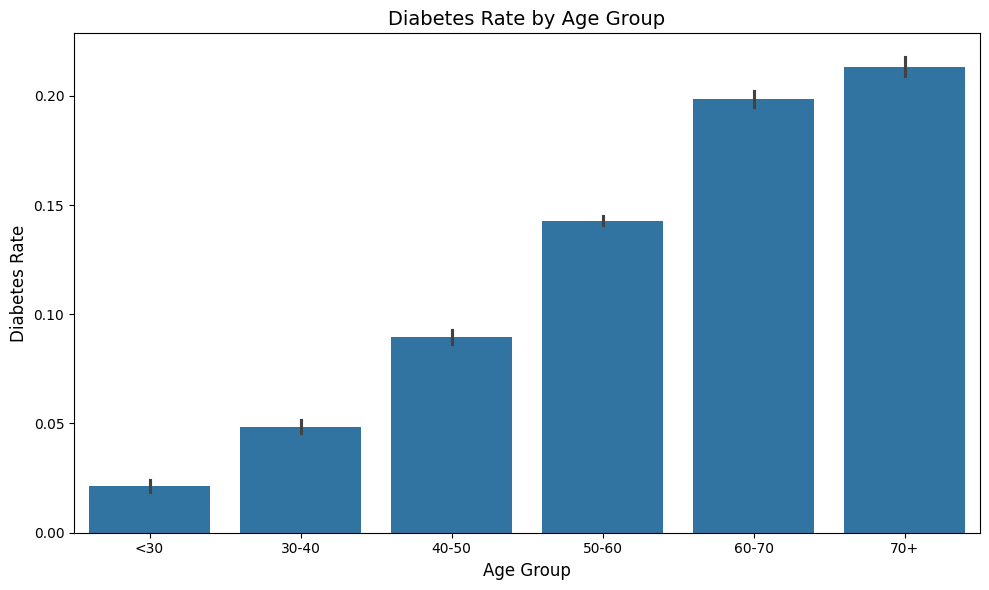

In [31]:
import seaborn as sns

plt.figure(figsize=(10, 6))

df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 70, 120], 
                         labels=['<30', '30-40', '40-50', '50-60', '60-70', '70+'])
sns.barplot(x='Age_Group', y='Diabetes', data=df, estimator=np.mean)
plt.title('Diabetes Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Diabetes Rate', fontsize=12)
plt.tight_layout()
plt.show()


D:\Temp\ipykernel_213972\119175363.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


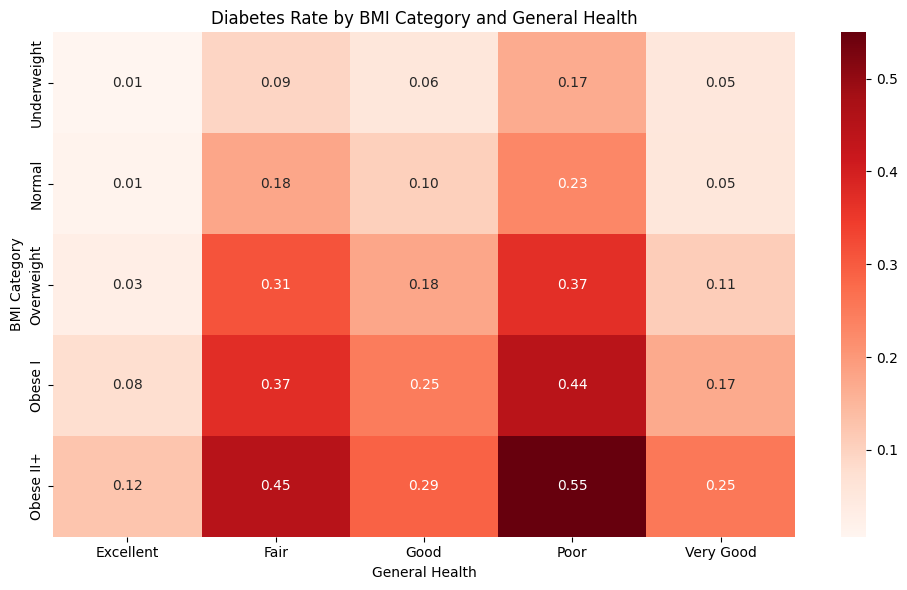

In [32]:
# BMI grouping
bins = [0, 18.5, 25, 30, 35, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II+']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, include_lowest=True)

# Creating Pivot Tables
heatmap_data = df.pivot_table(
    index='BMI_Category',
    columns='GeneralHealth',
    values='Diabetes',
    aggfunc='mean'
)

# Heat mapping
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds")
plt.title('Diabetes Rate by BMI Category and General Health')
plt.ylabel('BMI Category')
plt.xlabel('General Health')
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
df = pd.read_csv('zxia0226_A1_CleanDataset.csv')
data = df.describe()
print(data)
print(df.info())

           CholCheck            BMI         Smoker         Stroke  \
count  264802.000000  264802.000000  264802.000000  264802.000000   
mean        0.984490      27.885020       0.331727       0.011261   
std         0.123569       5.320355       0.470834       0.105520   
min         0.000000      12.000000       0.000000       0.000000   
25%         1.000000      26.000000       0.000000       0.000000   
50%         1.000000      27.000000       0.000000       0.000000   
75%         1.000000      29.000000       1.000000       0.000000   
max         1.000000      98.000000       1.000000       1.000000   

       HeartDiseaseorAttack  Mental (days)  Physical (days)       DiffWalk  \
count         264802.000000  264802.000000    264802.000000  264802.000000   
mean               0.065109       1.821829         2.189568       0.073919   
std                0.246719       5.861921         6.814883       0.261640   
min                0.000000       0.000000         0.000000       

In [34]:

df["Diabetes"] = df["Diabetes"].fillna(0)
df["Cholesterol"] = df["Cholesterol"].fillna(0)
df["Alcoholic"] = df["Alcoholic"].fillna(0)


df.to_csv("zxia0226_A1_CleanDataset.csv", index=False)


print(df[["Diabetes", "Cholesterol", "Alcoholic"]].isnull().sum())


Diabetes       0
Cholesterol    0
Alcoholic      0
dtype: int64
